In [4]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
import itertools
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler
import dtw
import yf_df as yfdf
import csv

In [2]:
df_spx_70 = pd.read_csv("^GSPC_1970-07-10.csv")
df_spx_now = pd.read_csv("^GSPC_2020-03-24.csv")
df_spx_dot = pd.read_csv("^GSPC_1998-01-01.csv")
df_spx_lm = pd.read_csv("^GSPC_2004-03-01.csv")

df_vix_lm = pd.read_csv("vix_lm.csv")
df_vix_dot = pd.read_csv("vix_dot.csv")
df_vix_now = pd.read_csv("vix_now.csv")

In [3]:
yfdf.to_csv("^GSPC", "1d", "2021-01-01", "2023-10-13")
yfdf.to_csv("^VIX", "1d", "2021-01-01", "2023-10-13")
yfdf.to_csv("^TNX", "1d", "2021-01-01", "2023-10-13")
yfdf.to_csv("GBPUSD=X", "1d", "2021-01-01", "2023-10-13")
yfdf.to_csv("JPY=X", "1d", "2021-01-01", "2023-10-13")
yfdf.to_csv("TLT", "1d", "2021-01-01", "2023-10-13")
yfdf.to_csv("DX=F", "1d", "2021-01-01", "2023-10-13")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,High,Low,Close,Open,Adj Close
Date,,,,,
2021-01-04,89.925003,89.389999,89.845001,89.870003,89.845001
2021-01-05,89.845001,89.389999,89.408997,89.845001,89.408997
2021-01-06,89.794998,89.165001,89.501999,89.389999,89.501999
2021-01-07,89.970001,89.324997,89.791000,89.330002,89.791000
2021-01-08,90.230003,89.625000,90.068001,89.839996,90.068001
...,...,...,...,...,...
2023-10-06,106.705002,105.680000,105.783997,106.099998,105.783997
2023-10-09,106.339996,105.760002,105.810997,106.004997,105.810997
2023-10-10,105.989998,105.410004,105.556999,105.714996,105.556999


In [7]:
df_1 = pd.read_csv("TLT_2021-01-01.csv", index_col=0)
df_1

,High,Low,Close,Open,Adj Close
Date,,,,,
2021-01-04,158.179993,156.539993,157.539993,156.669998,147.932327
2021-01-05,156.949997,155.660004,156.369995,156.949997,146.833725
2021-01-06,153.850006,152.289993,153.160004,153.820007,143.819473
2021-01-07,152.169998,151.259995,151.809998,151.789993,142.551804
2021-01-08,151.960007,150.660004,151.320007,151.479996,142.091690
...,...,...,...,...,...
2023-10-06,85.690002,84.059998,84.790001,84.199997,84.790001
2023-10-09,86.800003,84.949997,86.779999,85.500000,86.779999
2023-10-10,87.169998,85.519997,86.660004,85.849998,86.660004


In [4]:
scaler = MinMaxScaler()

df_sl_sum = pd.DataFrame()

df_70 = pd.DataFrame(df_spx_70["Close"])
sl_70 = scaler.fit_transform(df_70)
df_sl_70 = pd.DataFrame(sl_70)

df_dot = pd.DataFrame(df_spx_dot["Close"])
sl_dot = scaler.fit_transform(df_dot)
df_sl_dot = pd.DataFrame(sl_dot)

df_lm = pd.DataFrame(df_spx_lm["Close"])
sl_lm = scaler.fit_transform(df_lm)
df_sl_lm = pd.DataFrame(sl_lm)

df_now = pd.DataFrame(df_spx_now["Close"])
sl_now = scaler.fit_transform(df_now)
df_sl_now = pd.DataFrame(sl_now)

df_sl_sum = pd.concat([df_sl_sum, df_sl_70, df_sl_dot, df_sl_lm, df_sl_now], axis = 1)
df_sl_sum.columns = ["70s", "dotcom", "lemhan", "now"]


print("dtw 70 vs now",dtw.dtw(sl_70, sl_now, keep_internals = True).distance)
print("dtw dotcom vs now", dtw.dtw(sl_dot, sl_now, keep_internals = True).distance)
print("dtw lemhan vs now", dtw.dtw(sl_lm, sl_now, keep_internals = True).distance)
df_sl_sum.corr()


dtw 70 vs now 28.652790864631793
dtw dotcom vs now 55.02071805134526
dtw lemhan vs now 62.436440760369095


,70s,dotcom,lemhan,now
70s,1.000000,0.774904,0.642422,0.639197
dotcom,0.774904,1.000000,0.481326,0.593281
lemhan,0.642422,0.481326,1.000000,0.506482
now,0.639197,0.593281,0.506482,1.000000


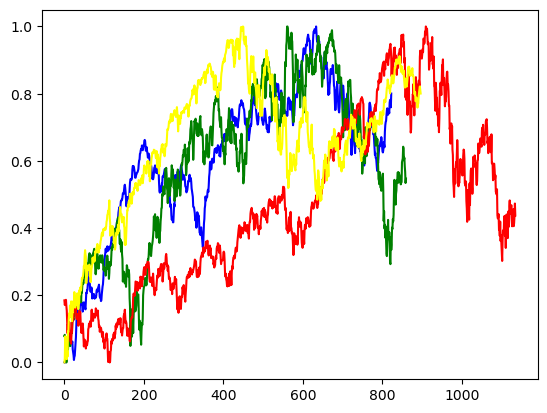

In [6]:
plt.plot(df_sl_sum["70s"], 'b')
plt.plot(df_sl_sum["dotcom"], 'g')
plt.plot(df_sl_sum["lemhan"], 'r')
plt.plot(df_sl_sum["now"], 'yellow')
plt.show()

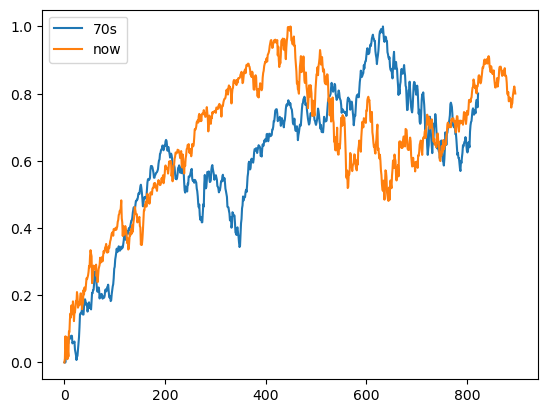

In [7]:
plt.plot(sl_70, label='70s')
plt.plot(sl_now, label='now')
plt.legend(ncols=1)
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 2) + inhomogeneous part.

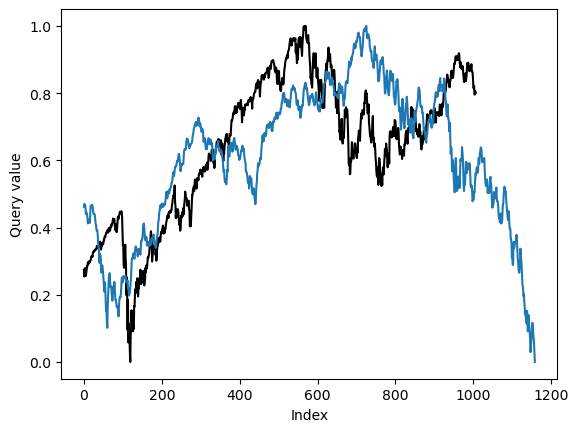

In [38]:
dtw.dtw(nm_nparr_spx_now, nm_nparr_spx_70, keep_internals=True, ).plot(type="twoway")

In [6]:
junk = []


nm_nparr_spx_now = scaler.fit_transform(df_spx_now_close)
nm_list_spx_now = nm_nparr_spx_now.tolist()
nm_df_spx_now_1 = pd.DataFrame(nm_nparr_spx_now)
df_spx_now_1 = pd.DataFrame({"ds" : df_spx_now_close.index, "y" : nm_df_spx_now_1[0]})
df_spx_now_1.head()

,ds,y
0,0,0.274641
1,1,0.254072
2,2,0.263067
3,3,0.279236
4,4,0.274070


In [7]:
nm_df_spx_lm_1 = pd.DataFrame(nm_nparr_spx_lm)
df_spx_lm_1 = pd.DataFrame({"ds" : df_spx_lm_close.index, "y" : nm_df_spx_lm_1[0]})
df_spx_lm_1.head()

,ds,y
0,0,0.979620
1,1,0.979159
2,2,0.971236
3,3,0.974894
4,4,0.991492


In [8]:
m = Prophet(daily_seasonality = True)
m.fit(df_spx_lm_1)

ParserError: day is out of range for month: 0 present at position 0

In [ ]:
future = m.make_future_dataframe(periods = 21)
print(future)

In [ ]:
future = m.make_future_dataframe(periods = 21)
future.tail()

forecast = m.predict(future)
forecast['ds'].tail()

m.plot(forecast);

In [6]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]


print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 4)
SARIMAX: (0, 0, 1) x (0, 1, 0, 4)
SARIMAX: (0, 1, 0) x (0, 1, 1, 4)
SARIMAX: (0, 1, 0) x (1, 0, 0, 4)


In [7]:
warnings.filterwarnings("ignore")

for param in pdq :
    for param_seasonal in seasonal_pdq :
        try :
            mod = sm.tsa.statespace.SARIMAX(df_spx_now,
                                           order = param,
                                           seasonal_order=param_seasonal,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            result = mod.fit()
            print('ARIMA{}x{}4 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0049      0.060     -0.082      0.935      -0.122       0.112
ma.S.L4       -1.0000    483.965     -0.002      0.998    -949.555     947.555
sigma2         0.0018      0.886      0.002      0.998      -1.735       1.739


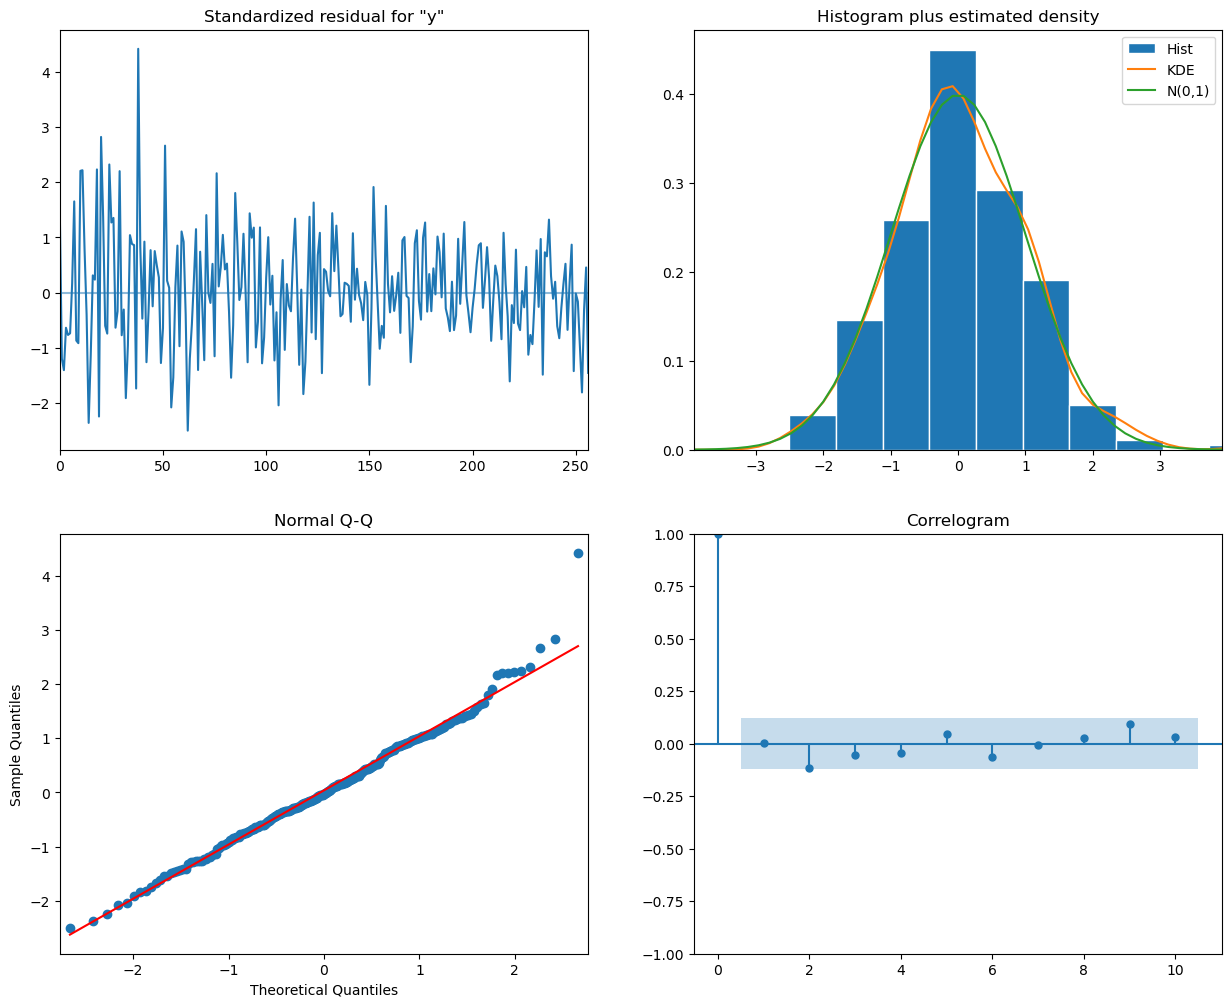

In [8]:
mod = sm.tsa.statespace.SARIMAX(nm_nparr_spx_now,
                               order=(0, 1, 1),
                               seasonal_order = (0, 1, 1, 4),
                               enforce_stationarity=False,
                               enforce_invertibility = False)
results = mod.fit()
print(results.summary().tables[1])
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
m = Prophet(daily_seasonality = True)
m.fit(df_spx_now_1)

In [ ]:
future = m.make_future_dataframe(periods = 21)
future.tail()

In [ ]:
forecast = m.predict(future)
forecast['ds'].tail()

In [ ]:
m.plot(forecast);